<a href="https://colab.research.google.com/github/RicardoPerez04/2018947_RAPI/blob/main/Actividades/RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Actividad 5: Uso de software para búsqueda. Ricardo Abraham Pérez Ibarra. Matrícula: 2018947. Hora: N4

In [1]:
#Librerias
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
#Cargar datos
tf.keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2979 - accuracy: 0.9162 - val_loss: 0.1776 - val_accuracy: 0.9480
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9590 - val_loss: 0.1172 - val_accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1039 - accuracy: 0.9687 - val_loss: 0.1048 - val_accuracy: 0.9658
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.1032 - val_accuracy: 0.9671
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.0840 - val_accuracy: 0.9741
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 0.0953 - val_accuracy: 0.9720
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0831 - val_accuracy: 0.9744
Epo

313/313 - 0s - loss: 0.0915 - accuracy: 0.9744 - 406ms/epoch - 1ms/step


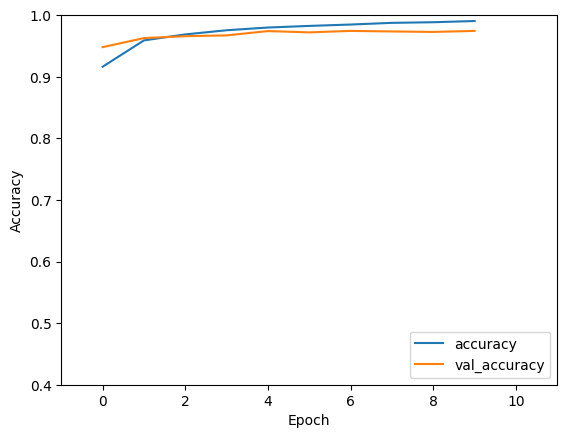

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [9]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 1ms/step


In [10]:
x = predictions[1]
y = y_test[1]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [3.0502822e-10 2.8481898e-07 9.9998957e-01 3.7220643e-06 3.7666732e-22
 4.1201202e-09 1.2542766e-09 2.8747928e-17 6.2720924e-06 3.0093172e-13] y la clase verdadera es:  2


In [11]:
x = predictions[50]
y = y_test[50]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [6.9782109e-06 7.8091791e-09 3.0432199e-07 2.3946768e-07 1.2654531e-08
 1.0391358e-05 9.9998170e-01 1.2603807e-11 2.1126660e-07 8.9814032e-09] y la clase verdadera es:  6


In [12]:
x = predictions[100]
y = y_test[100]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [1.4049940e-04 5.5380660e-08 6.2665674e-07 8.0973720e-08 4.5518846e-06
 5.4940232e-05 9.9978685e-01 1.0281797e-05 2.0637935e-06 2.1175263e-07] y la clase verdadera es:  6


In [13]:
x = predictions[1000]
y = y_test[1000]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [8.2241741e-11 1.0544024e-07 5.6970964e-12 1.4836357e-03 7.6642737e-06
 6.2344391e-08 8.8694904e-17 1.8437723e-04 5.0887770e-09 9.9832410e-01] y la clase verdadera es:  9


In [14]:
x = predictions[1500]
y = y_test[1500]
print("La red dice que la imagen es clase " , x , "y la clase verdadera es: " , y)

La red dice que la imagen es clase  [5.4538276e-07 6.1428440e-01 2.0967120e-04 4.6135247e-02 7.4949130e-02
 1.8473911e-05 1.5050396e-07 2.5591022e-01 7.5121205e-03 9.7999698e-04] y la clase verdadera es:  7
